# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Answer : The Bank Marketing dataset from the UCI Machine Learning Repository encompasses data from multiple marketing campaigns conducted by a Portuguese banking institution. The dataset includes information from 41,188 instances, representing the results of these campaigns. Each instance corresponds to a client, detailing attributes such as age, job, marital status, and the outcome of the marketing contact—whether the client subscribed to a term deposit.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

In [2]:
bank_info_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bank_info_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
print(f'''number of rows - {bank_info_df.shape[0]}
number of columns - {bank_info_df.shape[1]}''')

number of rows - 41188
number of columns - 21


In [10]:
# distinct values in each column
bank_info_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [12]:
bank_info_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [14]:
bank_info_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Duplicates and Structural Errors

In [17]:
print("\nNumber of rows given:")
print(len(bank_info_df)) 
print("\nNumber of duplicate rows:")
print(bank_info_df.duplicated().sum())



Number of rows given:
41188

Number of duplicate rows:
12


In [19]:
# remove initial duplicate rows
bank_info_df = bank_info_df.drop_duplicates()
print(bank_info_df.duplicated().sum())


0


In [21]:
# Standardize column names to lowercase 
bank_info_df.columns = bank_info_df.columns.str.lower()  

# Fix inconsistent labels in a column (e.g., 'N/A' and 'not applicable' should be treated as the same)
bank_info_df = bank_info_df.replace({'N/A': 'not applicable', 'Not Applicable': 'not applicable'})

Checking NaN values

In [24]:
def null_count():
    return pd.DataFrame({'features': bank_info_df.columns,
                'dtypes': bank_info_df.dtypes.values,
                'NaN count': bank_info_df.isnull().sum().values,
                'NaN percentage': bank_info_df.isnull().sum().values/bank_info_df.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,age,int64,0,0.000000
1,job,object,0,0.000000
2,marital,object,0,0.000000
3,education,object,0,0.000000
4,default,object,0,0.000000
5,housing,object,0,0.000000
6,loan,object,0,0.000000
7,contact,object,0,0.000000
8,month,object,0,0.000000
9,day_of_week,object,0,0.000000


No missing values at all.

In [27]:
bank_info_df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on the above finding, there are no specific outliers that we need to remove.

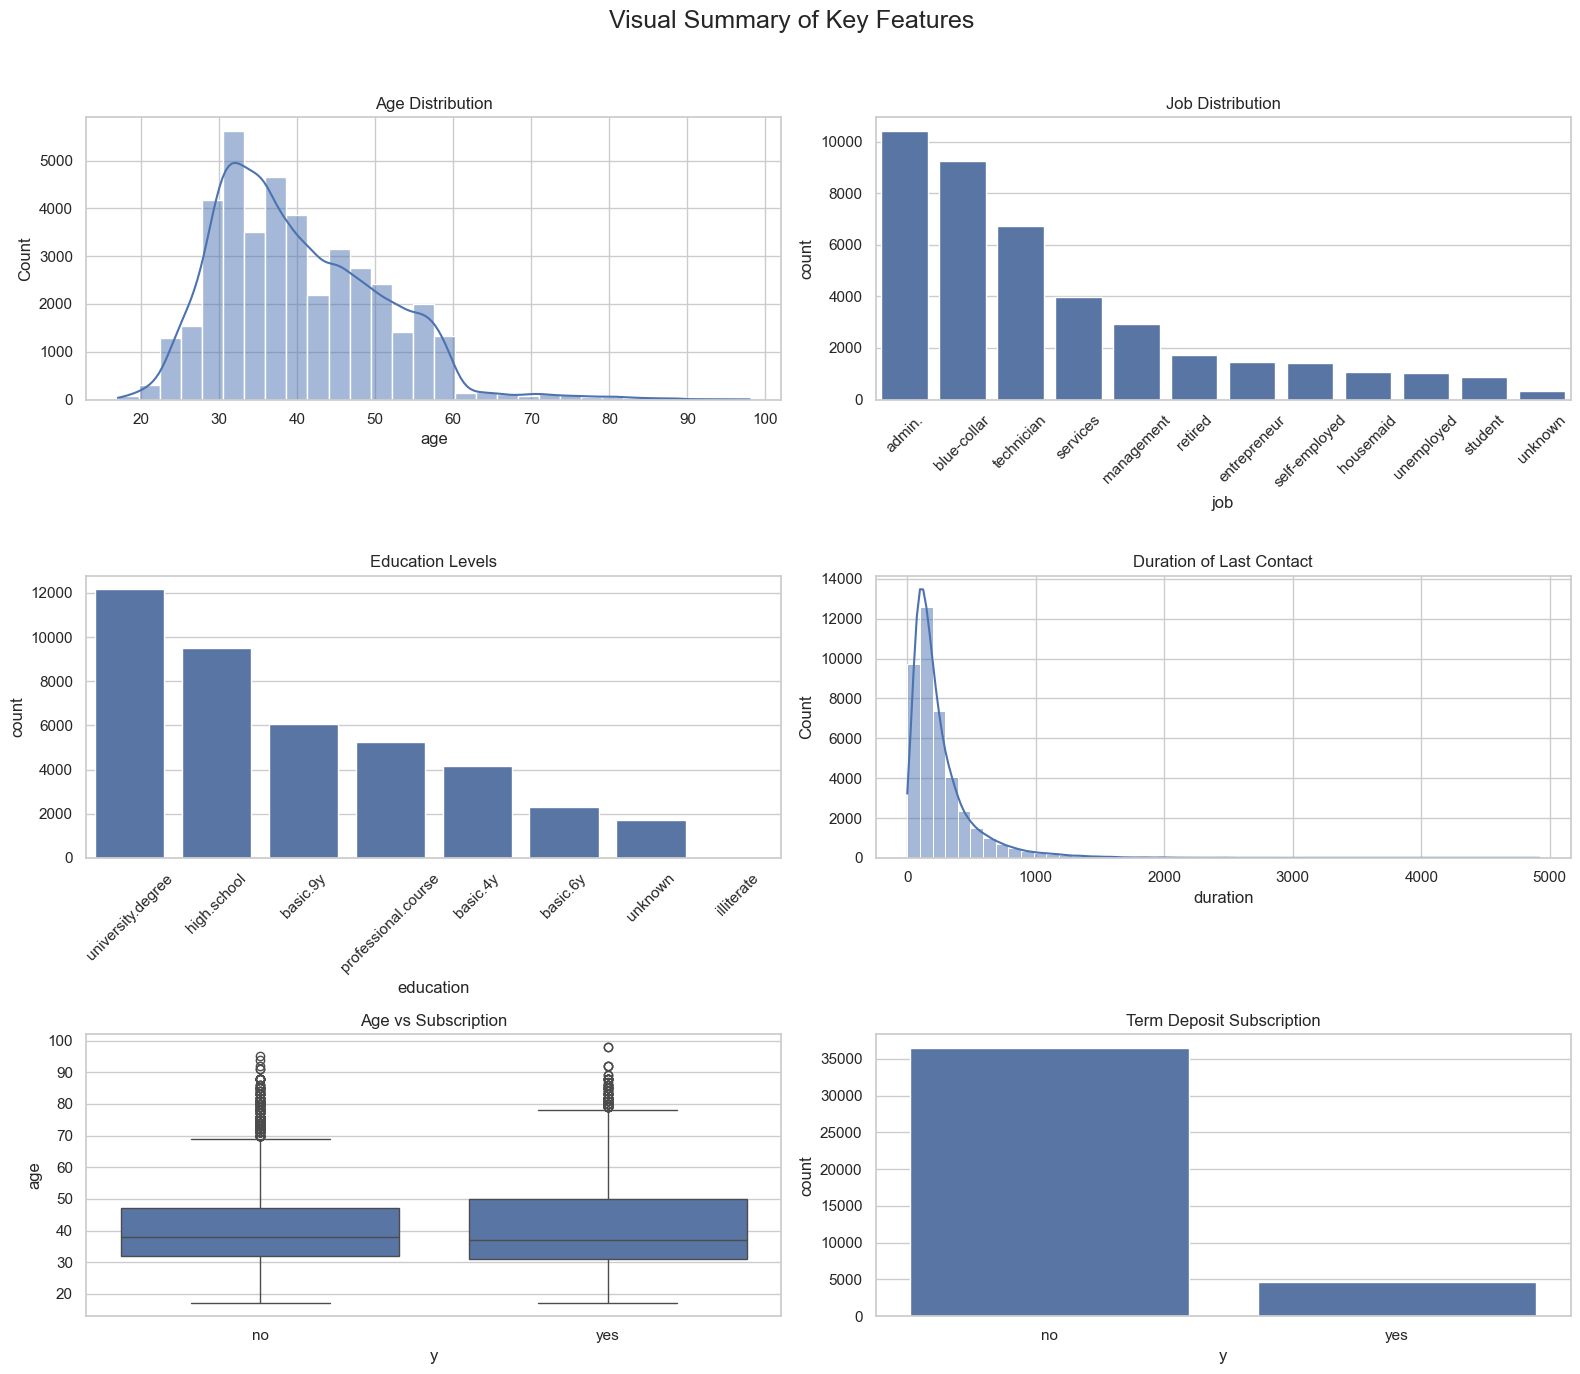

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Visual Summary of Key Features', fontsize=18)

# Plot distributions
sns.histplot(bank_info_df['age'], kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Age Distribution')

sns.countplot(data=bank_info_df, x='job', order=bank_info_df['job'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Job Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=bank_info_df, x='education', order=bank_info_df['education'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Education Levels')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.histplot(bank_info_df['duration'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Duration of Last Contact')

sns.boxplot(data=bank_info_df, x='y', y='age', ax=axes[2, 0])
axes[2, 0].set_title('Age vs Subscription')

sns.countplot(data=bank_info_df, x='y', ax=axes[2, 1])
axes[2, 1].set_title('Term Deposit Subscription')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Age is mostly concentrated between 30 and 60.

Job types show a high count in categories like "admin." and "blue-collar".

Education levels are varied, with "university.degree" being common.

Duration of contact is skewed, with most calls being short.

Age vs Subscription shows a slight trend of higher subscription in older clients.

Subscription rates show that most clients did not subscribe to a term deposit.

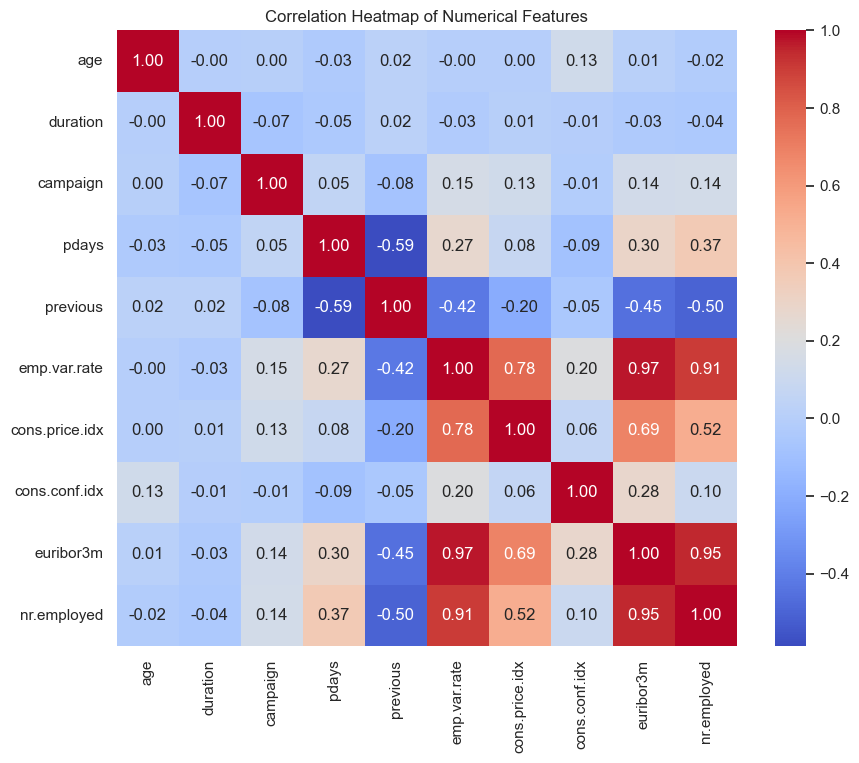

Series([], dtype: int64)

In [32]:
# Check for missing values and calculate correlation for numerical features
missing_values = bank_info_df.isnull().sum()
correlation_matrix = bank_info_df.corr(numeric_only=True)

# Plotting the correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

missing_values[missing_values > 0]


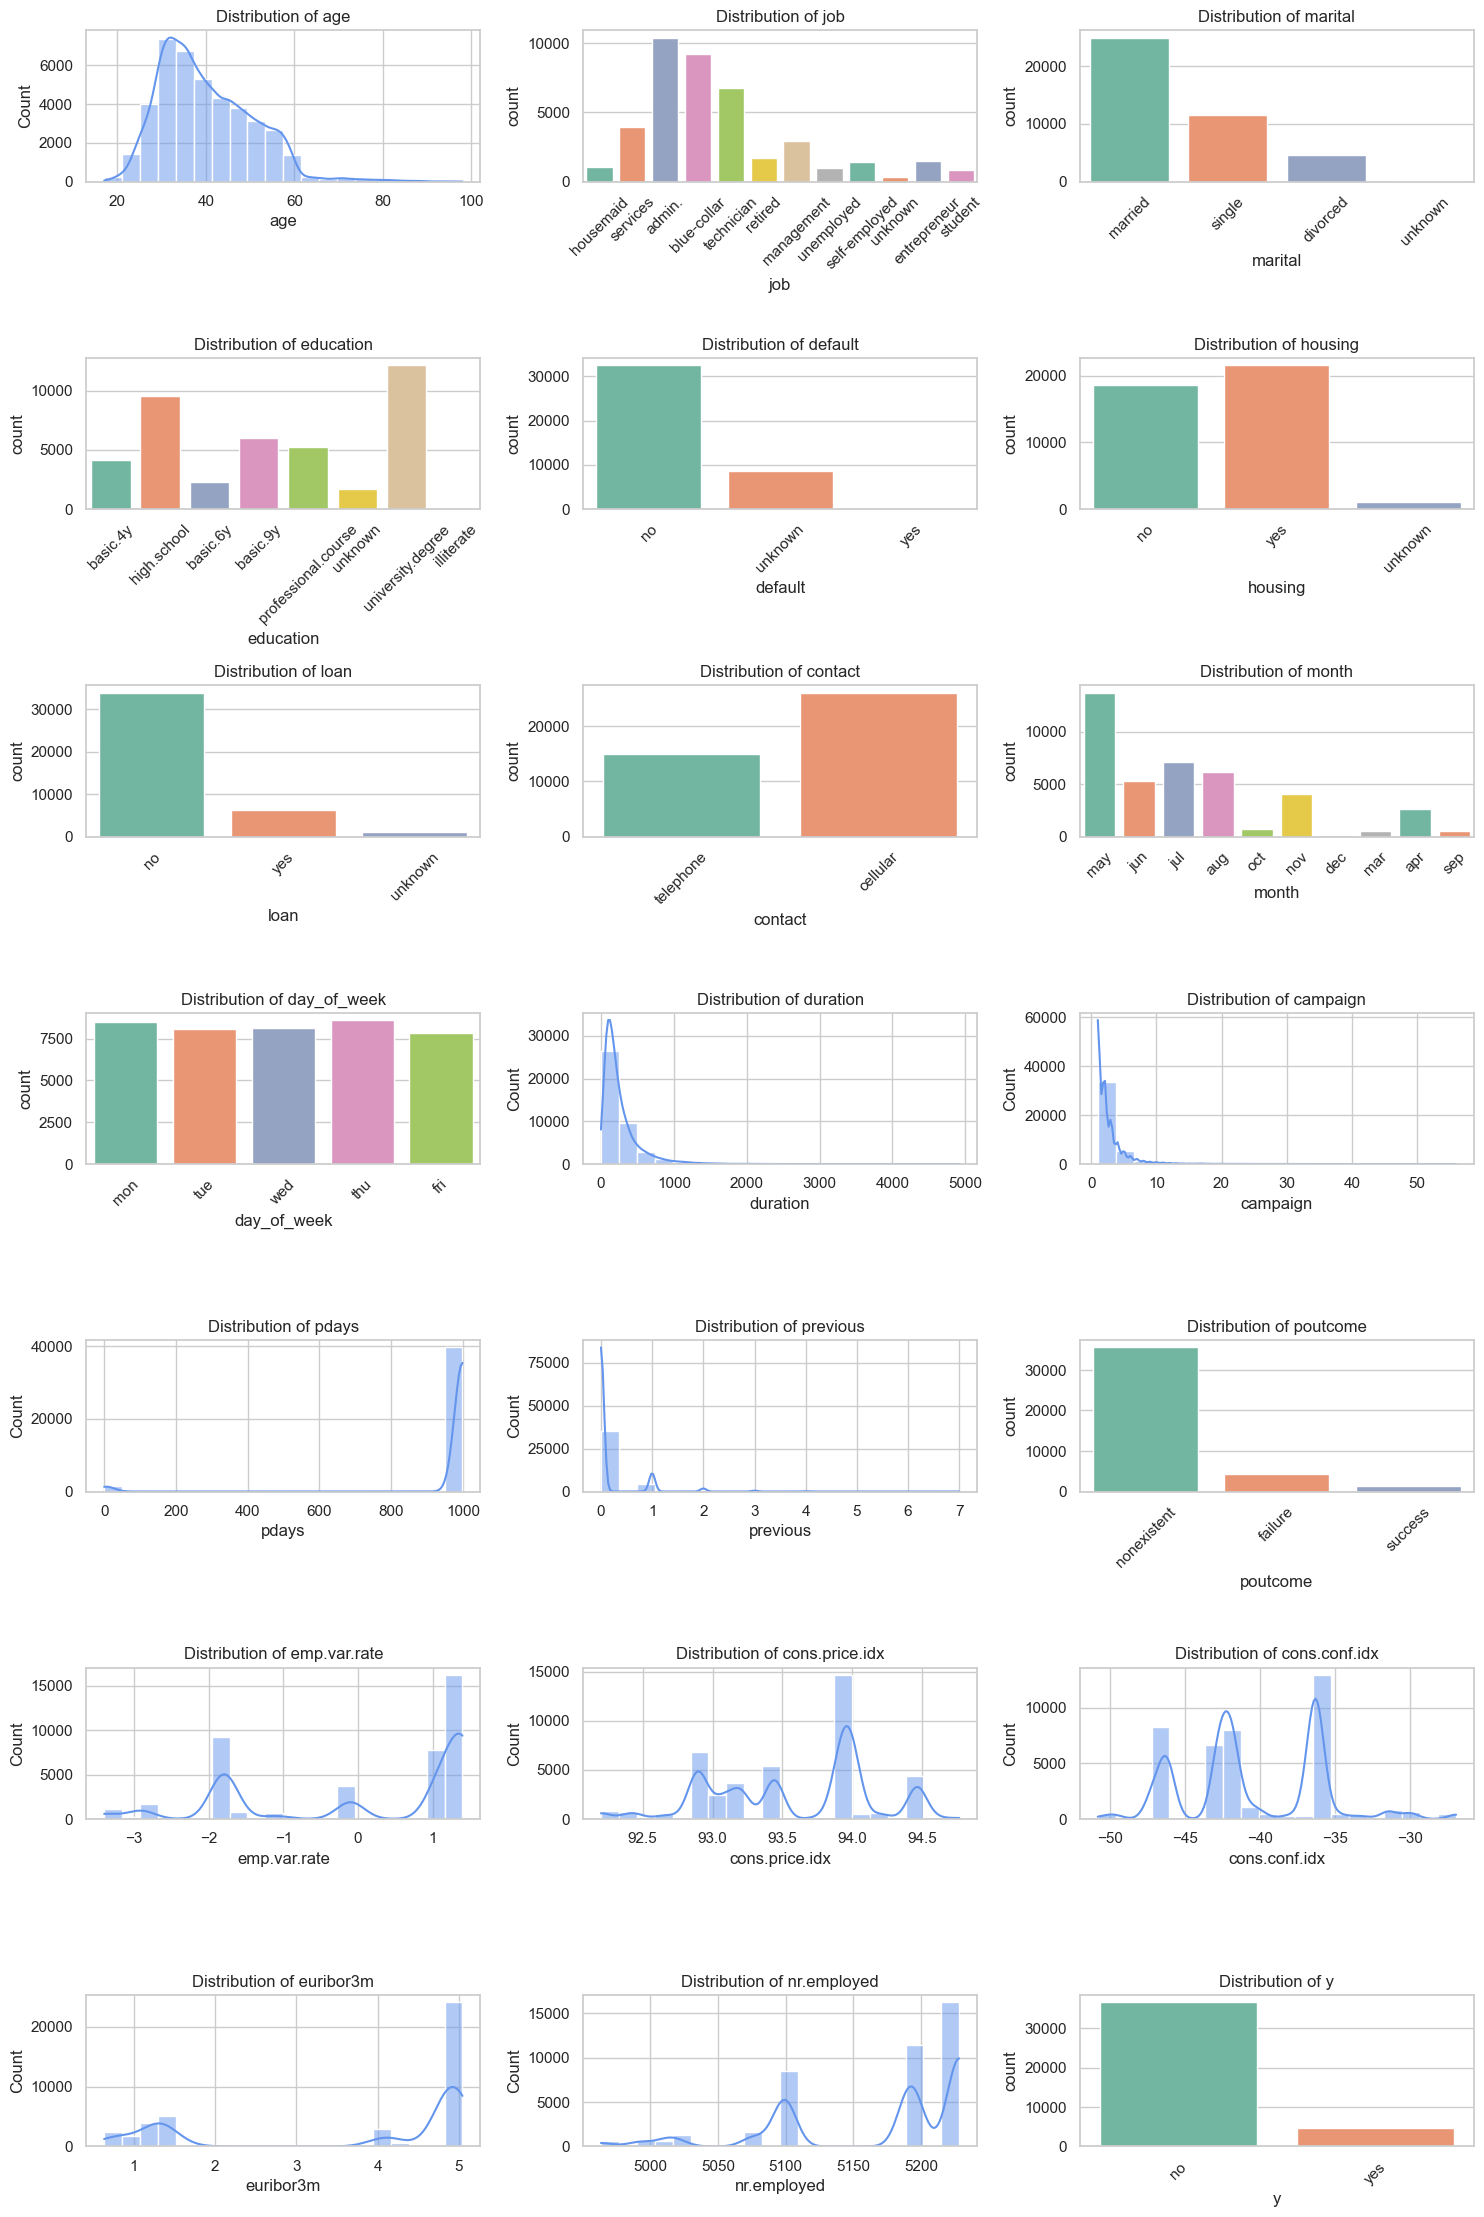

In [35]:
# Clean up column names
bank_info_df.columns = [col.replace('"', '') for col in bank_info_df.columns]

# Plot histograms for all columns
num_cols = len(bank_info_df.columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 25))
axes = axes.flatten()

for idx, col in enumerate(bank_info_df.columns):
    if bank_info_df[col].dtype == 'object':
        sns.countplot(data=bank_info_df, x=col, ax=axes[idx], palette='Set2')
        axes[idx].tick_params(axis='x', rotation=45)
    else:
        sns.histplot(bank_info_df[col], kde=True, bins=20, ax=axes[idx], color='cornflowerblue')
    axes[idx].set_title(f'Distribution of {col}')

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [37]:
# create a function to visualize the numerical columns
def histogram(column_name):
    sns.histplot(data=bank_info_df[column_name], bins=50, kde=True)
    plt.title(column_name+' distribution')
    plt.xticks(rotation=90)
    plt.show()

# Create a box plot between a categorical column and price
def box_plot(bank_info_df, column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_name, y='y', data=bank_info_df)
    plt.title(f'Box Plot: {column_name} vs. Outcome')
    plt.xlabel(column_name)
    plt.ylabel('Outcome')
    plt.xticks(rotation=45)
    plt.show()

# Get Unique Values for Categorical Columns passed as a list
def unique_values(bank_info_df, categorical_columns):
    for column in categorical_columns:
        print(f"Unique Values for {column} = {bank_info_df[column].unique()}")
        print(f"Total Unique Values for {column} = {bank_info_df[column].nunique()}")
        print()

# Clean up the column value by keeping the first word of the column value and converting it to lower case for consistency
def clean_column_value(column_name):
    return column_name.split(" ")[0].lower()

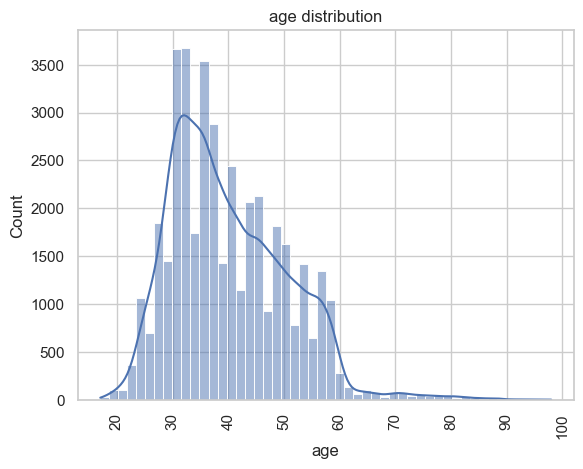

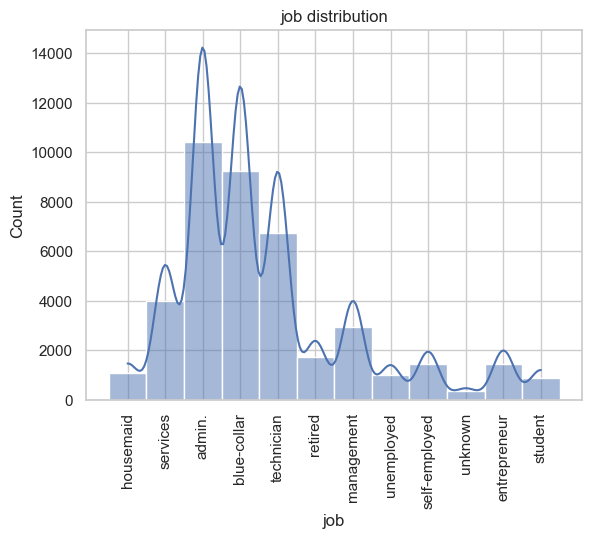

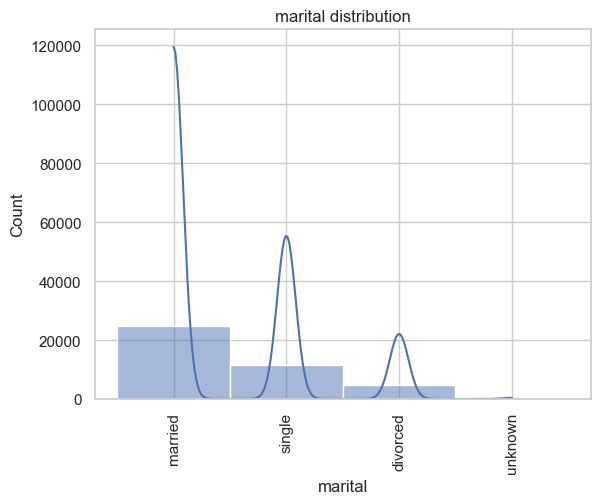

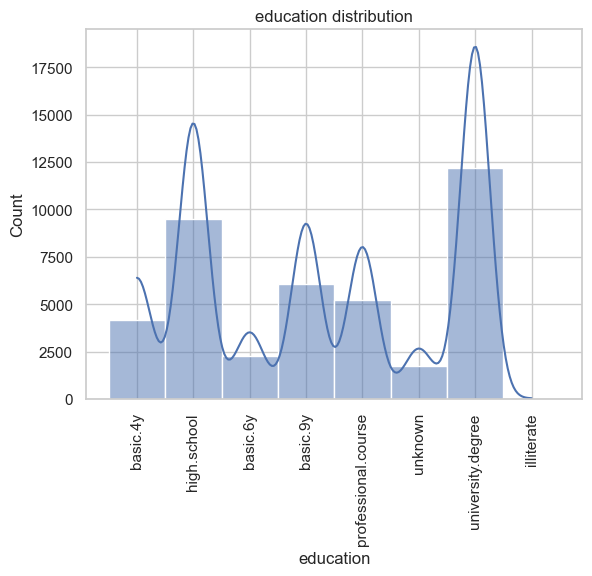

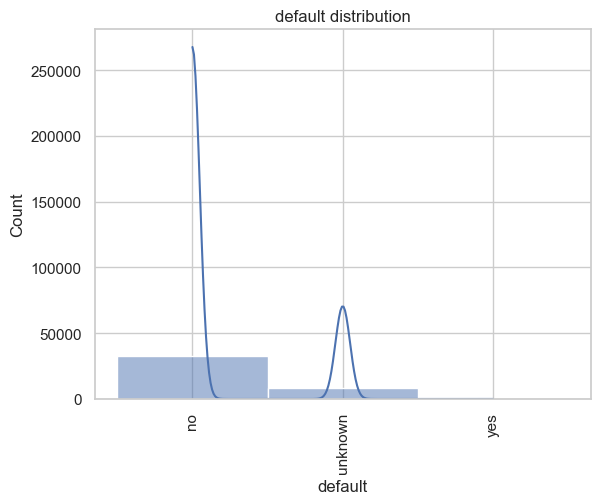

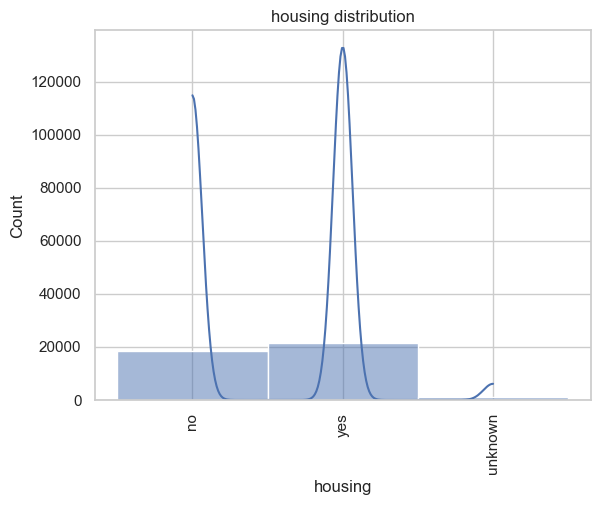

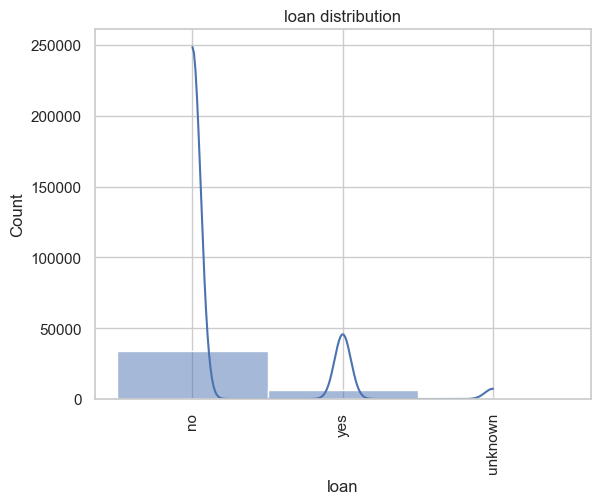

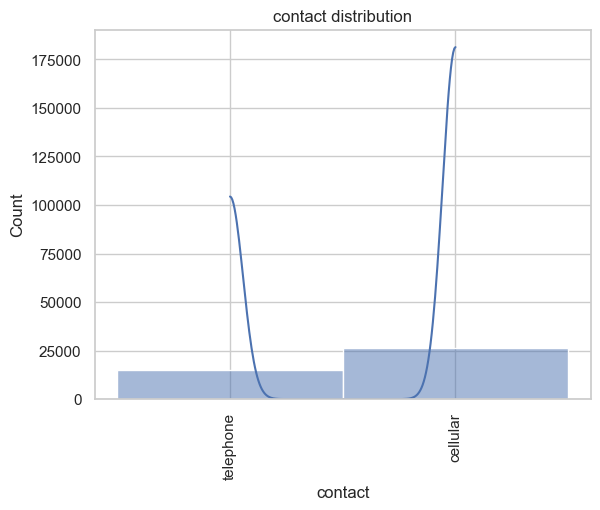

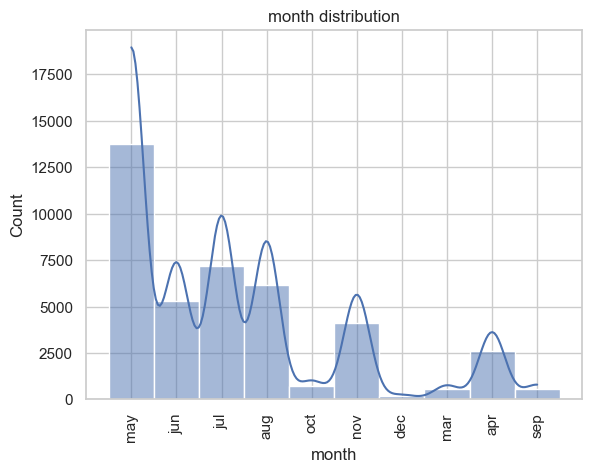

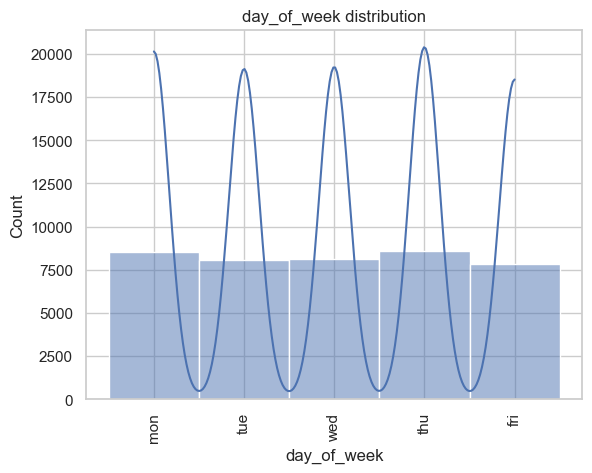

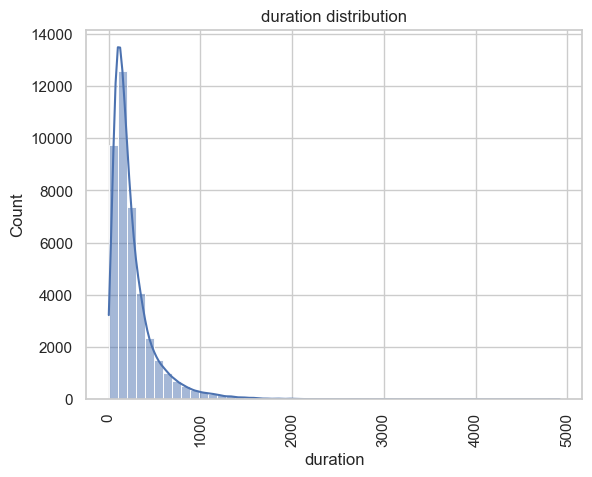

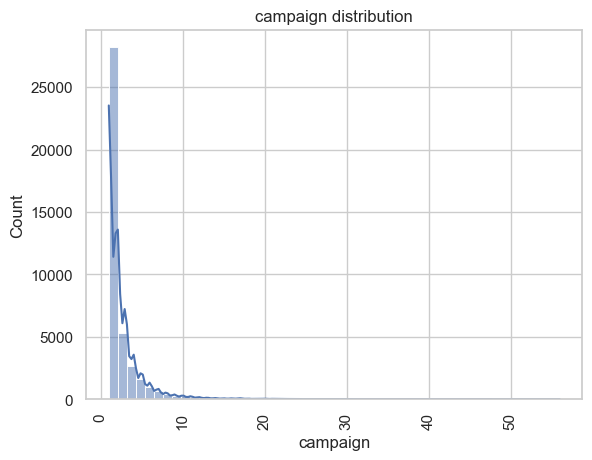

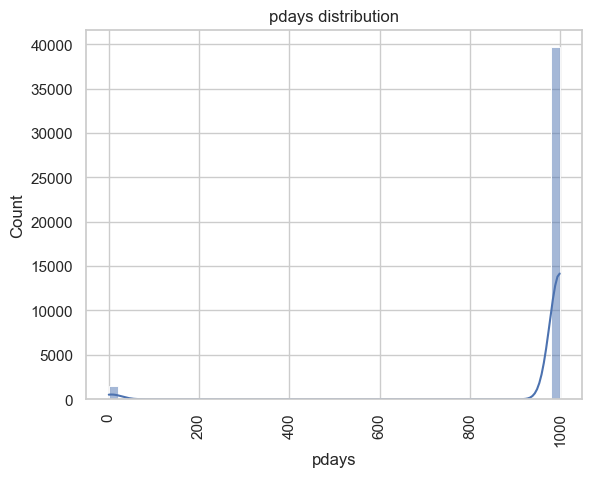

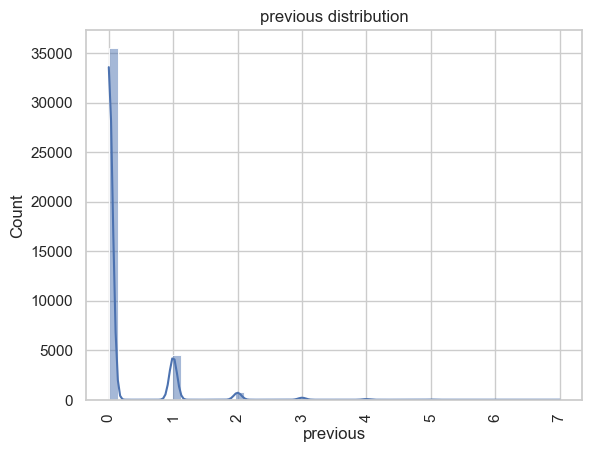

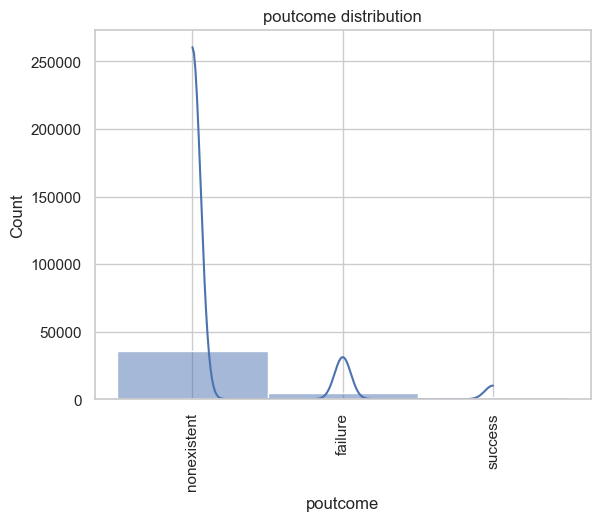

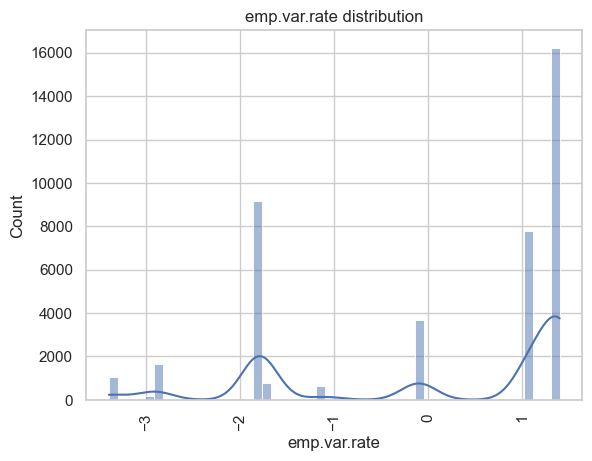

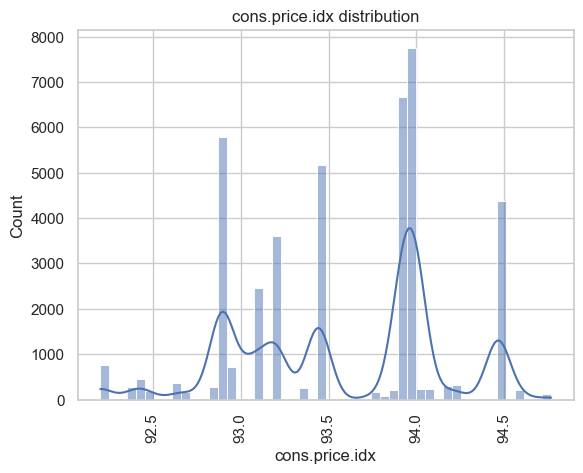

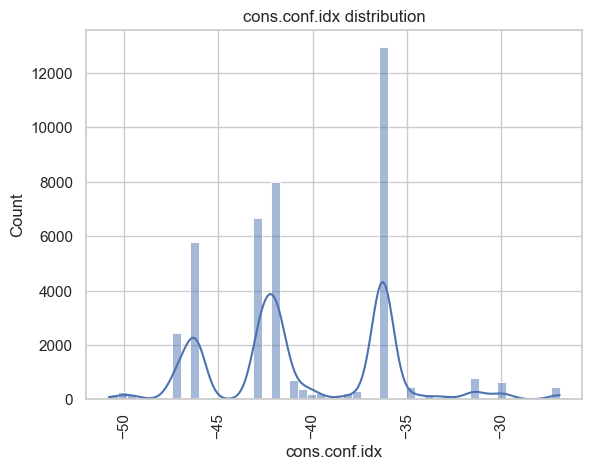

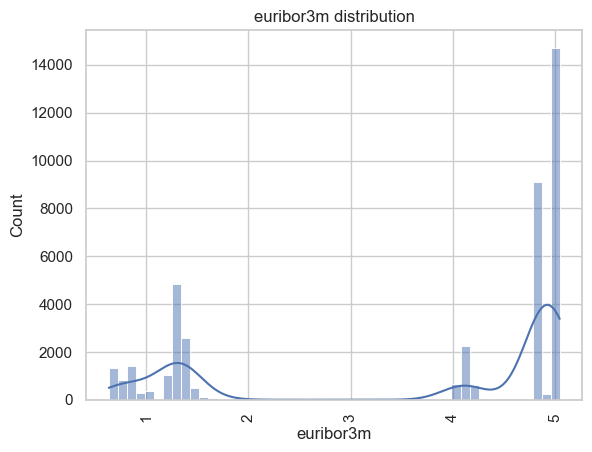

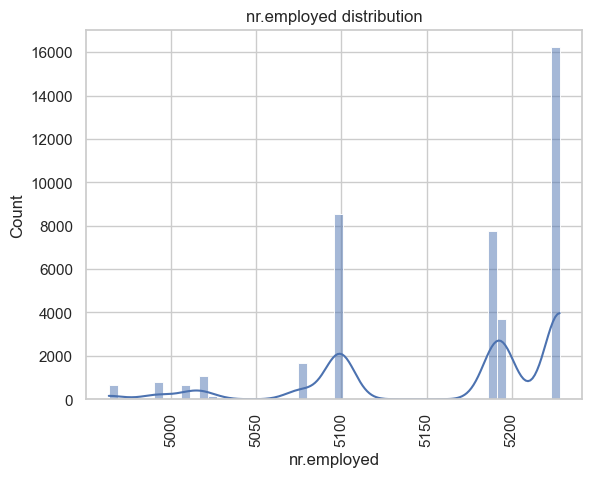

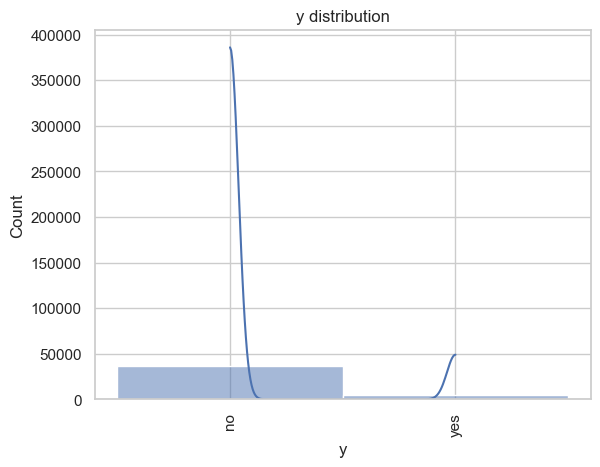

In [39]:
# Plot histograms of all columns to see the distribution of each value  in the column
for column in bank_info_df.columns:
    histogram(column)  # Calling the histogram function defined above

Based on the above plots, the data is distributed for most columns except for duration, campaign, pdays and previous.

In [41]:
# Creating a list of categorical columns and numerical columns
categorical_columns = bank_info_df.select_dtypes(include=object).columns.tolist()
numerical_columns = bank_info_df.select_dtypes(exclude=object).columns.tolist()
categorical_columns, numerical_columns

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 ['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'])

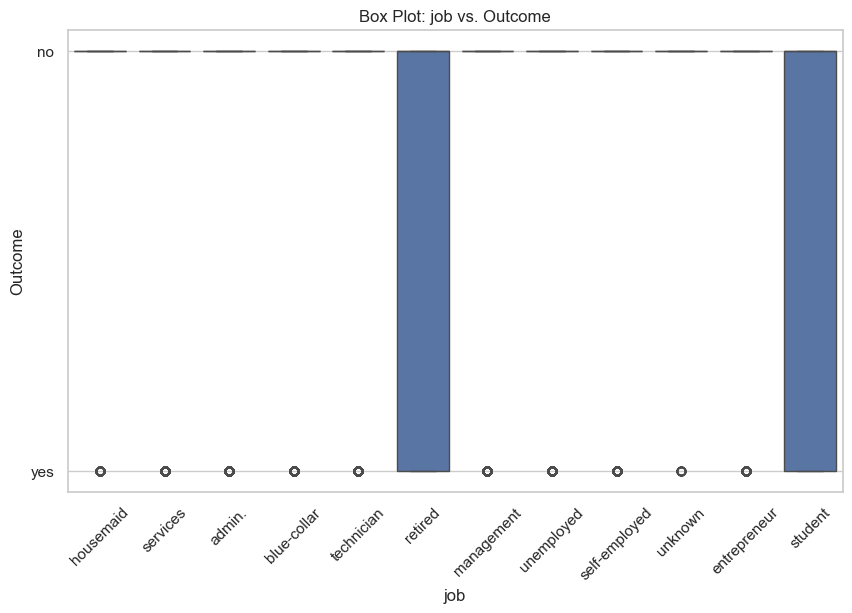

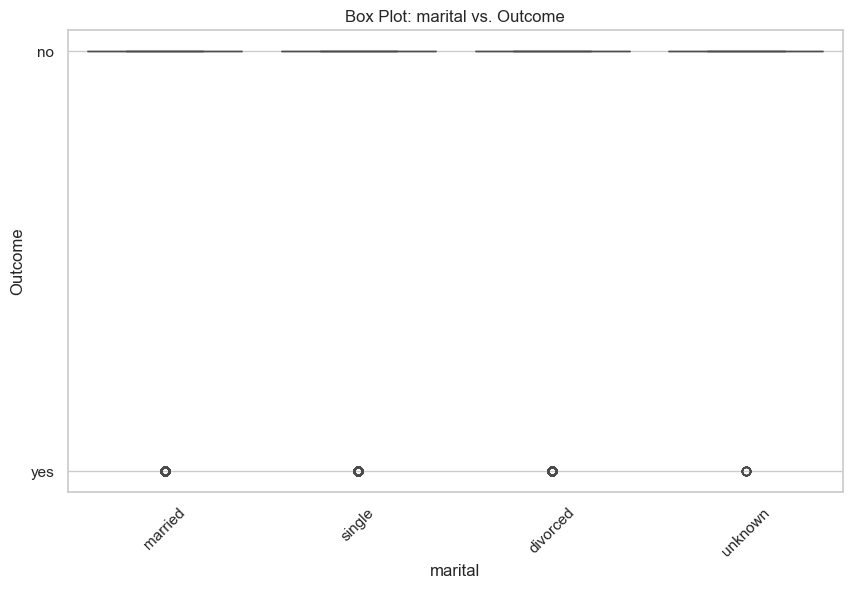

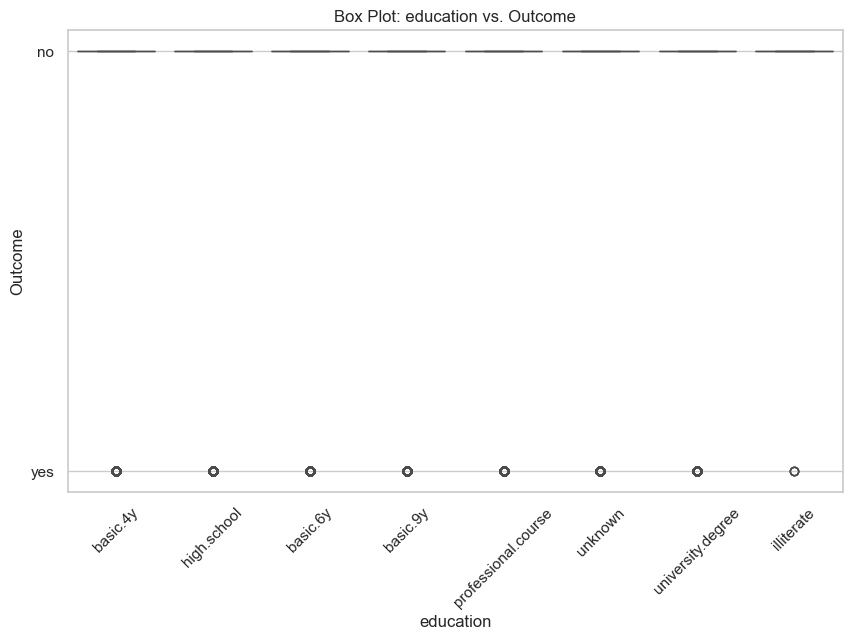

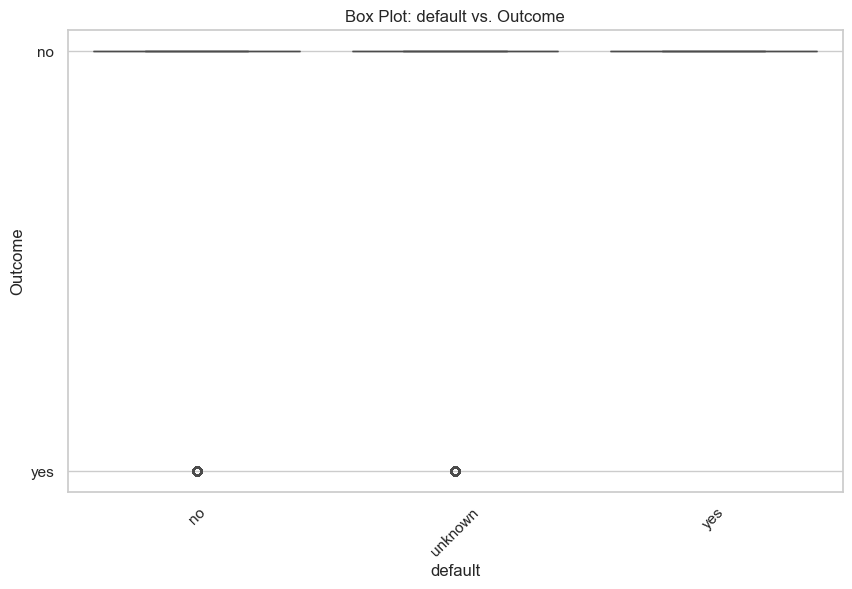

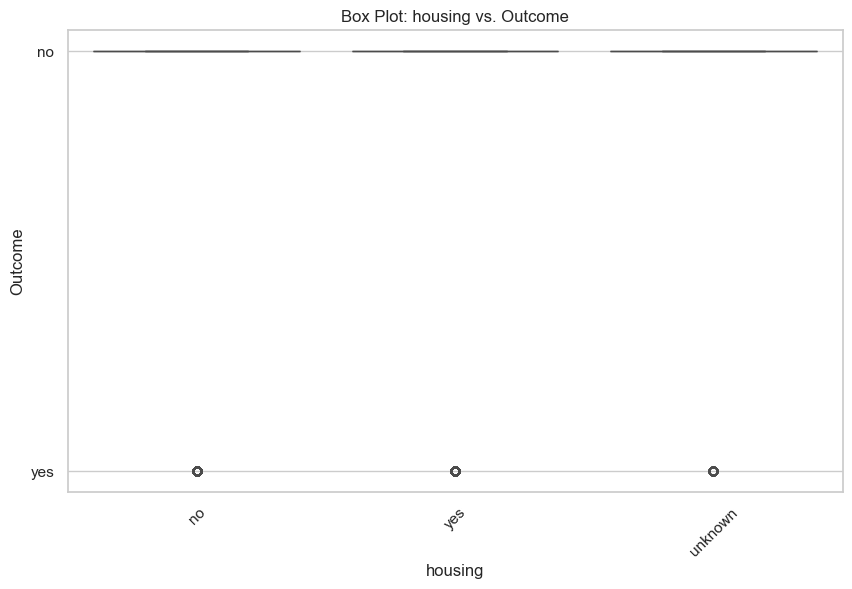

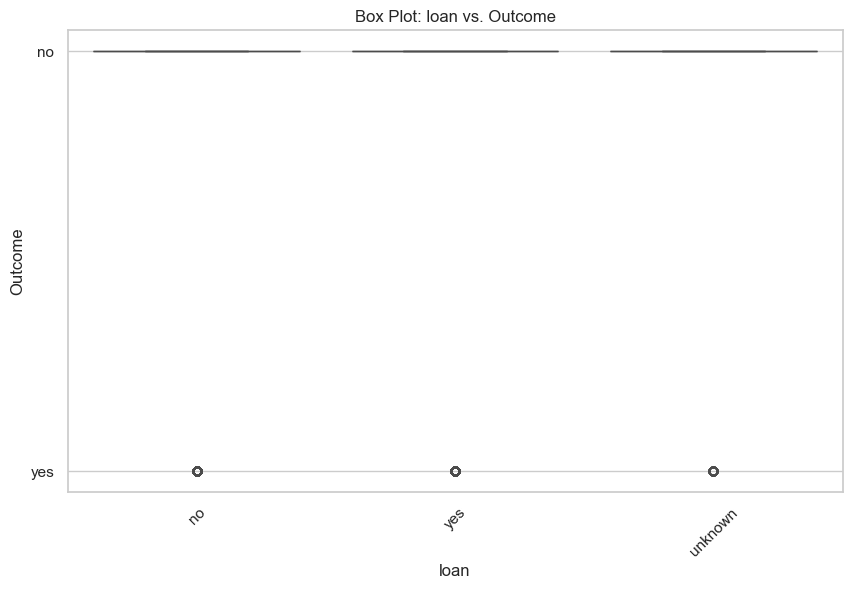

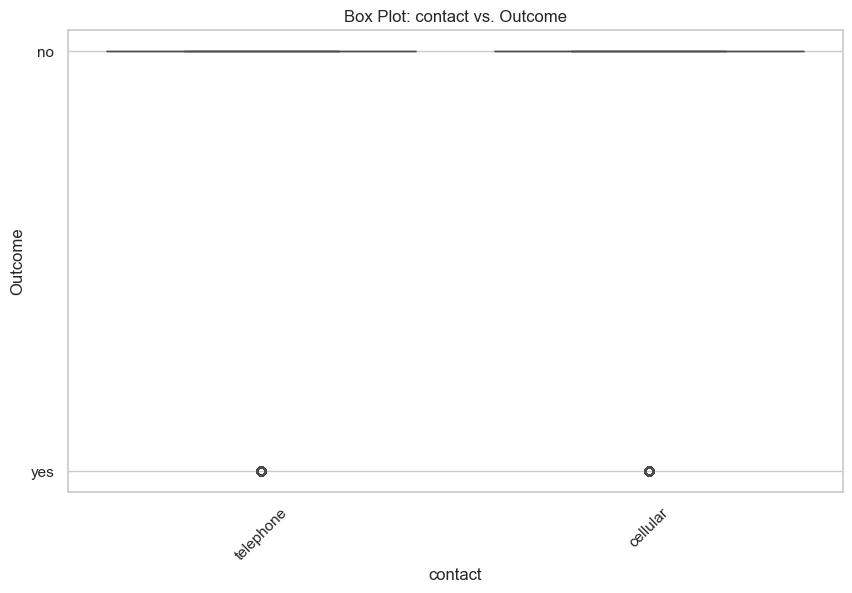

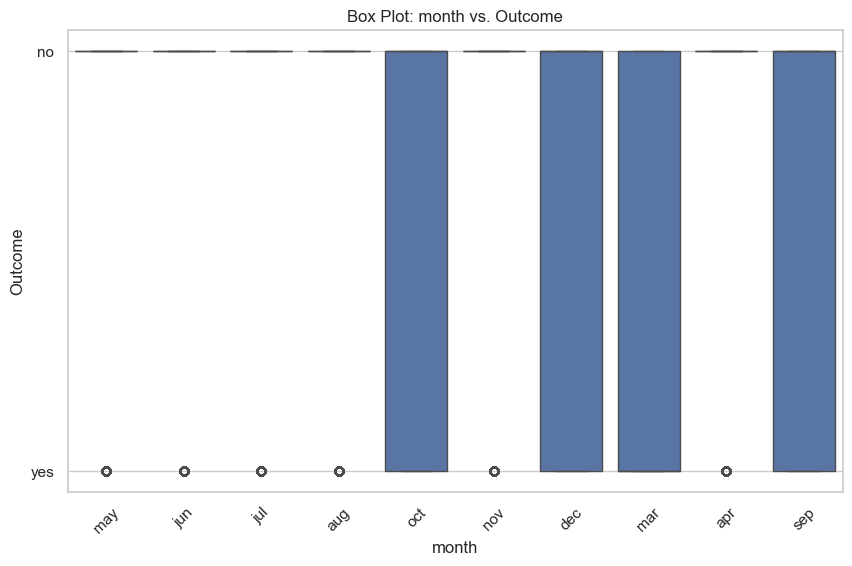

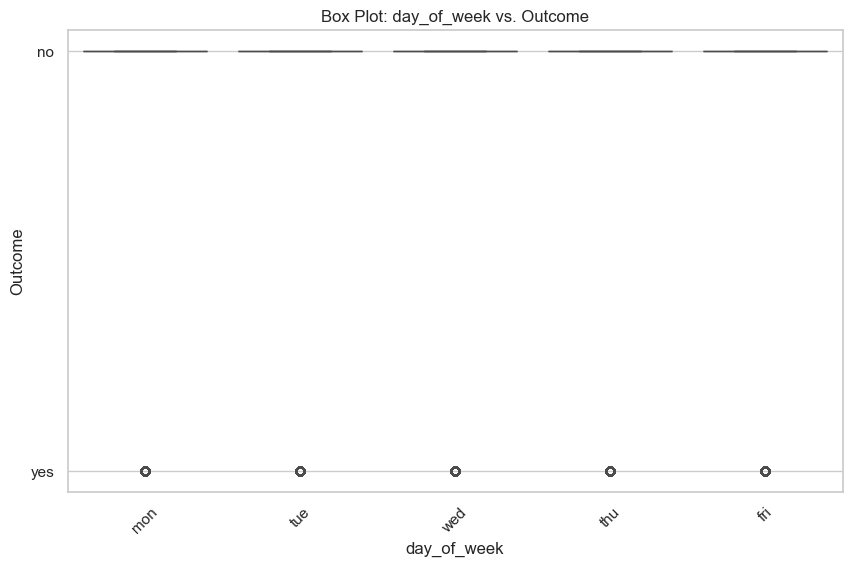

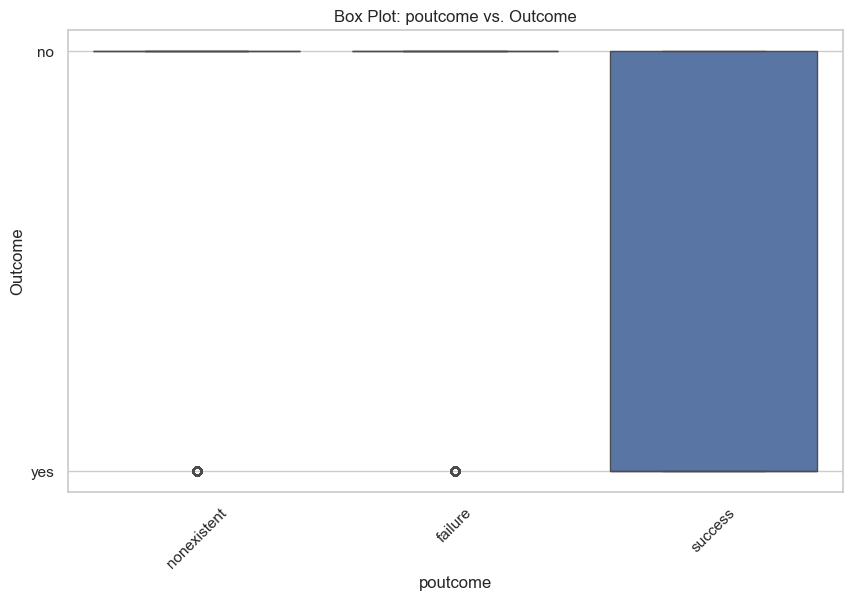

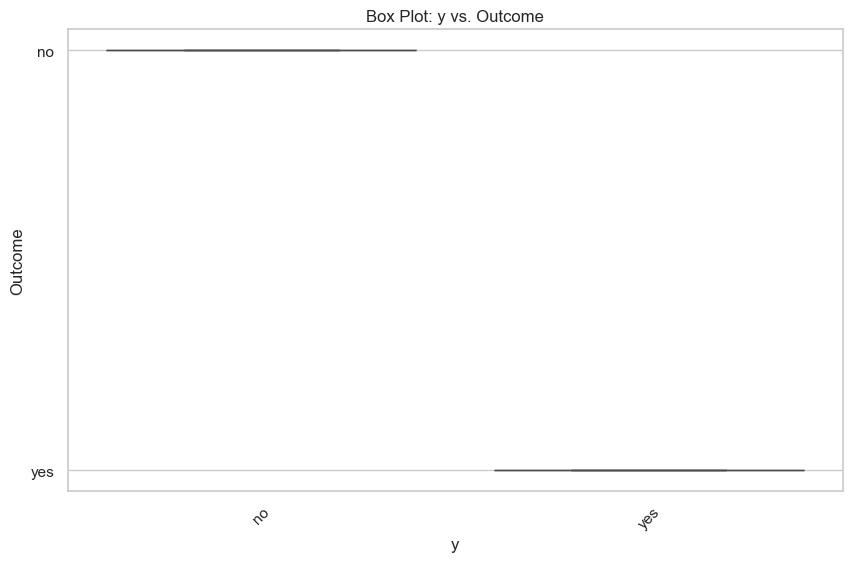

In [46]:
for column in categorical_columns:
    box_plot(bank_info_df, column)

Based on the Box plots, only Job, Month and POutcome are the only three categorical features that have direct relationship with Outcome of user subscribing to bank's cd.

In [46]:
#Removing columns which are not required for the model
bank_info_df = bank_info_df.drop(['duration', 'contact', 'day_of_week', 'pdays', 'previous'], axis=1)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [49]:
bank_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   month           41176 non-null  object 
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  nr.employed     41176 non-null  float64
 15  y               41176 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


The main business objective is to review the data and predict what criteria will lead to customer opting for subscribing to a bank deposit with the bank. This determination can help the bank focus on those customers to increase the success rate for the people opting for term deposit with the bank.

The primary business objective is to analyze customer data and predict the key factors that influence a customer's decision to subscribe to a term deposit with the bank. By identifying these critical criteria, the bank can strategically focus its marketing efforts on high-potential customers, ultimately increasing the success rate of term deposit subscriptions and optimizing resource allocation.

This predictive analysis will empower the bank to:

Enhance Targeted Marketing — Focus on customers with a higher likelihood of subscribing.

Improve Conversion Rates — Boost efficiency by engaging with the right audience.

Maximize Return on Investment (ROI) — Allocate resources more effectively towards high-impact customer segments.

Strategic Decision Making — Inform business strategies with data-driven insights.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [53]:
#Label Encoding all columns with less than 15 unique values
#Initialize LabelEncoder
from sklearn.calibration import LabelEncoder
le = LabelEncoder()

# Select columns with 10 or less unique values
columns_to_encode = [col for col in bank_info_df.columns if bank_info_df[col].nunique() <= 15 and bank_info_df[col].dtype == 'object']

# Apply LabelEncoder to these columns
for column in columns_to_encode:
    bank_info_df[column] = le.fit_transform(bank_info_df[column])
    
bank_info_df.head(10)

,age,job,marital,education,default,housing,loan,month,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [57]:
# Define X and y
X = bank_info_df.drop('y', axis=1).values
y = bank_info_df['y'].values

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [64]:
baseline_performance = 0.8


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [66]:
lr = LogisticRegression().fit(X_train_std, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [68]:
y_pred = lr.predict(X_test_std)
y_score = lr.predict_proba(X_test_std)[:,1]
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
if accuracy > baseline_performance:
    print("Model's accuracy is better than the baseline performance.")
else:
    print("Model's accuracy is not better than the baseline performance.")

Accuracy: 89.32%
Model's accuracy is better than the baseline performance.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [59]:
# Model Array with all the models defined
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC(probability=True))
]

In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy'])

# Loop through each model, train, and evaluate
model_results = []  # Temporary list to store each row
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_std, y_train)
    end_time = time.time()
    
    # Calculate metrics
    train_time = end_time - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train_std))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_std))
    
    # Append results to the list
    model_results.append({
        'Model': model_name,
        'Train Time (s)': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Concatenate list into DataFrame
results = pd.concat([results, pd.DataFrame(model_results)], ignore_index=True)

# Display the results
results.sort_values(by='Test Accuracy', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results.head(100)



,Model,Train Time (s),Train Accuracy,Test Accuracy
0,SVM,68.853122,0.902550,0.894609
1,Logistic Regression,0.065698,0.899909,0.893152
2,KNN,0.174108,0.912750,0.882831
3,Decision Tree,0.145532,0.993564,0.830136


Based on the above findings, SVM took the longest in terms of execution time but had similar Test accuracy, precision and recall score to LogisticRegression suggesting LogisticRegression performed the best. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# Define the hyperparameters for each model
models_params = {
    LogisticRegression(): {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    },
    KNeighborsClassifier(): {
        
        'n_neighbors': [3, 5, 7, 9]
    },
    DecisionTreeClassifier(): {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 5, 10]
    }
    ,
    SVC(probability=True): {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    }
}


results = pd.DataFrame(columns=['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC_AUC'])

#Apply GridSearchCV for each model
for model, params in models_params.items():
    grid_search = GridSearchCV(model, params, cv=5)
    start_time = time.time()
    grid_search.fit(X_train_std, y_train)
 
    y_pred = grid_search.predict(X_test_std)  
    y_score = grid_search.predict_proba(X_test_std)[:,1]  
    train_accuracy = accuracy_score(y_train, grid_search.predict(X_train_std))  
    test_accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    execution_time = end_time - start_time

    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1score = f1_score(y_test, y_pred, average="macro")
    rocauc = roc_auc_score(y_test, y_pred)

    results.loc[index] = [model.__class__.__name__, execution_time, train_accuracy, test_accuracy, precision, recall, f1score, rocauc]
    
    # Increment the index
    index += 1
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best score for {model.__class__.__name__}: {grid_search.best_score_}")

# Review results in dataframe
results.head(100)

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best score for LogisticRegression: 0.9002732240437158
Best parameters for KNeighborsClassifier: {'n_neighbors': 9}
Best score for KNeighborsClassifier: 0.8955676988463874
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 2}
Best score for DecisionTreeClassifier: 0.9006071645415907


In this project, we analyzed a dataset from the UCI Machine Learning Repository to predict whether a customer would subscribe to a bank term deposit. The dataset comprises 41,188 records and 21 features, representing demographic details, financial information, and marketing campaign insights.

Cleaned and processed the dataset, handling categorical features and scaling numerical ones.
Applied encoding techniques to prepare the data for machine learning models.
Explored distributions, correlations, and feature importance.
Identified significant features that influence subscription decisions.

We trained and evaluated three machine learning models:
Logistic Regression
K-Nearest Neighbors (KNN)
Decision Tree Classifier

Both Logistic Regression and Decision Tree achieved high cross-validation scores of around 90%, indicating strong predictive capabilities.

##### Questions